## Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

## Read Data

In [2]:
# 구매 데이터 읽기
purchase = pd.read_csv('../data/DC_구매내역정보.csv', parse_dates=['구매일자'], encoding='cp949')
print('데이터 크기:', purchase.shape)

데이터 크기: (101325, 9)


In [3]:
purchase.sample(5)

,ID,상품대분류명,상품중분류명,구매지역,구매일자,구매시간,구매수량,구매금액,취소여부
73064,480846548,식품,음료,경기 안양시,2014-03-21 17:00:00,17,9,80000,0
101248,974948810,의류잡화,여성용의류-SPA,서울 송파구,2014-07-12 20:00:00,20,1,27000,0
55081,142184860,레포츠,스포츠용품/의류,서울 송파구,2014-04-27 16:00:00,16,1,26000,0
61034,584431338,의류잡화,여성용의류-정장류,서울 동대문구,2014-03-08 16:00:00,16,1,282000,0
90387,51761252,식품,가공식품,경기 고양시,2014-08-30 19:00:00,19,1,6000,0


## 매장 유형 파악
`질문` 구매 지역마다 판매하는 상품대분류명을 보면 가전제품&생활잡화, 두 상품군 외 다른 상품군까지로 나뉘어지는데 매장 유형이 다른 걸까?
- 롯데 계열사 데이터로 자료조사를 해보았을 때 가전제품&생활잡화만 판매하는 곳은 `롯데 하이마트`, 다른 곳은 `롯데백화점`임을 알아내었다.<br>
  [하이마트 지점 안내] https://company.himart.co.kr/store/search

In [4]:
purchase.groupby('구매지역')['상품대분류명'].unique()

구매지역
경기 고양시     [생활잡화, 식품, 의류잡화, 가전제품, 레포츠, 가구, 명품]
경기 광명시     [의류잡화, 레포츠, 식품, 가전제품, 명품, 가구, 생활잡화]
경기 광주시                                  [가전제품]
경기 구리시     [의류잡화, 생활잡화, 식품, 레포츠, 가전제품, 가구, 명품]
경기 군포시                                  [가전제품]
                          ...                 
서울 영등포구    [의류잡화, 가전제품, 식품, 레포츠, 생활잡화, 가구, 명품]
서울 용산구                            [가전제품, 생활잡화]
서울 은평구                            [가전제품, 생활잡화]
서울 중구      [레포츠, 의류잡화, 식품, 명품, 가전제품, 생활잡화, 가구]
서울 중랑구                                  [가전제품]
Name: 상품대분류명, Length: 65, dtype: object

In [5]:
# 하이마트 지점 안내와 구글맵(상봉점 존재, 서대문구X) 상으론 서울의 23개 구에 존재한다.
purchase.loc[purchase.구매지역.str.contains('서울')].groupby('구매지역')['상품대분류명'].unique()

구매지역
서울 강남구     [가전제품, 식품, 의류잡화, 명품, 생활잡화, 레포츠, 가구]
서울 강동구                            [가전제품, 생활잡화]
서울 강북구     [가전제품, 의류잡화, 식품, 레포츠, 생활잡화, 명품, 가구]
서울 강서구         [레포츠, 가전제품, 식품, 의류잡화, 생활잡화, 가구]
서울 관악구     [레포츠, 생활잡화, 식품, 가구, 가전제품, 의류잡화, 명품]
서울 광진구         [생활잡화, 의류잡화, 식품, 가전제품, 레포츠, 명품]
서울 구로구                            [가전제품, 생활잡화]
서울 금천구                                  [가전제품]
서울 노원구     [식품, 생활잡화, 의류잡화, 가전제품, 레포츠, 가구, 명품]
서울 도봉구                            [가전제품, 생활잡화]
서울 동대문구    [의류잡화, 가전제품, 식품, 레포츠, 생활잡화, 가구, 명품]
서울 동작구                            [가전제품, 생활잡화]
서울 마포구                            [가전제품, 생활잡화]
서울 서대문구                                 [가전제품]
서울 서초구                                  [가전제품]
서울 성동구                                  [가전제품]
서울 성북구                                  [가전제품]
서울 송파구     [생활잡화, 의류잡화, 식품, 가전제품, 가구, 레포츠, 명품]
서울 양천구                            [가전제품, 생활잡화]
서울 영등포구    [의류잡화, 가전제품, 식품, 레포츠, 생활잡화, 가구, 명품]
서울 용산구                            [가전제품, 생활잡화]
서울 은평구  

`질문` 백화점에서도 가전잡화, 생활잡화를 구매할 수 있는데 어떻게 매장 유형 Label을 생성하는 게 좋을까?
- 거래내역의 대부분이 백화점에서 이루어졌다고 볼 수 있다. 
- 거래가 많이 이루어진 백화점에서, 매장이 많은 하이마트에서 할 법한 전략을 제안하기 위해선 보수적이게 Label을 생성하는 게 좋다.
- `거래`별로 묶고 가전제품, 생활잡화 외의 상품이 판매되었으면 백화점으로, 아니면 하이마트로 판단한다.

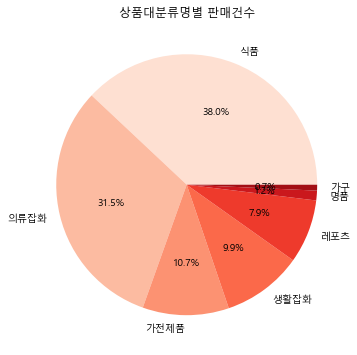

In [6]:
plt.figure(figsize=(6,6))
purchase.상품대분류명.value_counts().plot.pie(title="상품대분류명별 판매건수", colors=sns.color_palette("Reds",7), autopct='%1.1f%%')
plt.ylabel('')
plt.show()

`질문` 거래는 어떻게 정의해야 할까?
- 백화점에서 구매활동은 매장별로 이루어져 동일한 백화점을 이용한 경우에도 구매시간이 다르게 나온다.
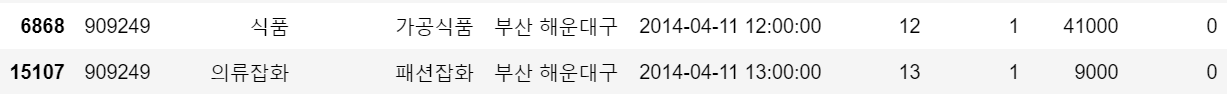
- 한 거래로, 고객의구매여정이라 판단할 수 있는 시간간격은<br>
  https://brunch.co.kr/@logibridge/376?utm_source=oneoneone와 구매시간간격 분포에 따라 `6시간`으로 한다.

In [7]:
# 고객의 구매건 당 구매시간간격
# 고객별 최초의 거래의시간간격값은 NaN으로 표현된다. 발생할 수 없는 100000 로 채운다.
ease = purchase.sort_values(by=['ID', '구매지역', '구매일자'])\
       .groupby(['ID','구매지역'])['구매일자'].diff().astype('timedelta64[h]').fillna(100000)
ease.head()

15051    100000.0
39001       578.0
1302        308.0
26143       291.0
67041         3.0
Name: 구매일자, dtype: float64

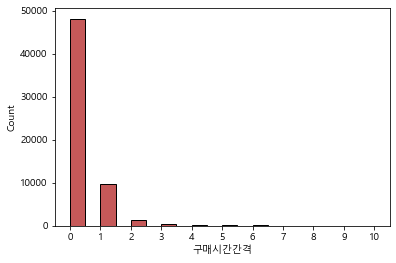

In [8]:
# 롯데백화점, 하이마트 모두 10시부터 20시까지 운영하기에 한 거래의 구매시간간격은 10 이하여야 한다.
# 분포를 보고 6시간까지를 한 거래로 판단한다.
sns.histplot(ease[ease <= 10], bins=20, color='firebrick')
plt.xticks(range(11))
plt.xlabel('구매시간간격')
plt.show()

In [9]:
# 거래별 ID를 생성한다.
tranid = []

i = 0
for t in ease:
    if t > 7 or t == 100000:
        i += 1
    tranid.append(i)

# 40858개 거래로 구분했다.
tranid = pd.Series(tranid, index=ease.index, name='거래ID')
purchase = pd.concat([purchase, tranid], axis=1)

In [10]:
# 거래당 상품대분류명 구성에 따라 백화점과 하이마트로 구분한다.
ease = purchase.groupby('거래ID')['상품대분류명'].unique().apply(lambda x: len(set(x)-{'가전제품','생활잡화'}))\
       .apply(lambda x: '백화점' if x != 0 else '하이마트').rename('매장ID')
purchase = purchase.merge(ease.reset_index(), on='거래ID')

## 매장별 구매 특성
- 대부분의 거래는 백화점에서 일어났으며 백화점은 구매가 자주 일어나고 가격대가 높은 의류잡화를 적극 판매하거나<br>
  파레토 법칙에 따라 소수의 대주주가 관심있는 가구, 명품의 상품 진열에 신경써야 한다.
- 하이마트는 가전제품을 사려할 때 방문하며 전자제품으로 가격대가 높다.

In [11]:
pd.pivot_table(purchase, index='상품대분류명', columns='매장ID', values='거래ID', aggfunc=pd.Series.nunique)

매장ID,백화점,하이마트
상품대분류명,,
가구,584.0,NaN
가전제품,1530.0,5788.0
레포츠,4613.0,NaN
명품,824.0,NaN
생활잡화,3484.0,2560.0
식품,17797.0,NaN
의류잡화,16174.0,NaN


In [12]:
pd.pivot_table(purchase, index='상품대분류명', columns='매장ID', values='구매금액', aggfunc=np.mean)

매장ID,백화점,하이마트
상품대분류명,,
가구,223067.031464,NaN
가전제품,66724.950100,287071.205572
레포츠,85329.251531,NaN
명품,369325.714286,NaN
생활잡화,54958.938831,73623.195380
식품,13921.049214,NaN
의류잡화,84792.044814,NaN


## Save data

In [42]:
purchase.to_csv('../data/DC_구매내역정보.csv', index=False, encoding='cp949')